# Galaxy Classification

In this project, I will be using logistic classification to recognise spiral galaxies (such as the Milky Way) from non-spiral galaxies.

## Testing image

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
from astroNN.datasets import galaxy10
from tensorflow.keras import utils
import numpy as np

images, labels = galaxy10.load_data()



labels = labels.astype(np.float32)
images = images.astype(np.float32)


C:\Users\dellg\.astroNN\datasets\Galaxy10.h5 was found!


7.0


'Disk, Face-on, Tight Spiral'

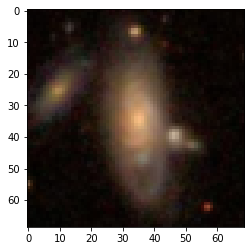

In [59]:

index = 9
plt.imshow((images[index]).astype(np.uint8))
print(labels[index])
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
galaxy10cls_lookup(labels[index])

# for i in labels:
#     i = int(i)
#     if labels[i] == 0 or labels[i] == 1 or labels[i] == 2 or labels[i] == 3 or labels[i] == 4 or labels[i] == 5 or labels[i] == 6 or labels[i] == 9:
#         labels[i] = 0
#     elif labels[i] == 7 or labels[i] == 8:
#         labels[i] = 1

In [48]:
for i in labels:
    print(i)



2.0
2.0
4.0
2.0
4.0
1.0
1.0
1.0
1.0
7.0
1.0
3.0
1.0
7.0
7.0
8.0
1.0
9.0
1.0
2.0
2.0
4.0
4.0
1.0
1.0
1.0
2.0
1.0
0.0
1.0
1.0
1.0
0.0
2.0
1.0
0.0
2.0
0.0
1.0
2.0
6.0
1.0
2.0
0.0
1.0
1.0
1.0
6.0
7.0
1.0
9.0
1.0
8.0
0.0
7.0
7.0
1.0
9.0
1.0
1.0
2.0
1.0
1.0
8.0
2.0
4.0
0.0
1.0
2.0
4.0
0.0
1.0
4.0
2.0
8.0
6.0
1.0
2.0
2.0
1.0
8.0
0.0
0.0
7.0
1.0
1.0
2.0
0.0
4.0
7.0
1.0
1.0
1.0
7.0
0.0
8.0
2.0
2.0
2.0
2.0
1.0
8.0
1.0
2.0
7.0
2.0
7.0
2.0
2.0
1.0
2.0
7.0
4.0
1.0
2.0
0.0
0.0
1.0
0.0
2.0
1.0
2.0
2.0
6.0
1.0
7.0
1.0
6.0
2.0
0.0
1.0
1.0
2.0
1.0
2.0
0.0
4.0
1.0
1.0
1.0
2.0
4.0
4.0
2.0
4.0
1.0
2.0
2.0
1.0
8.0
1.0
4.0
1.0
0.0
2.0
2.0
2.0
7.0
4.0
2.0
0.0
9.0
1.0
1.0
4.0
7.0
2.0
2.0
1.0
6.0
1.0
1.0
2.0
1.0
0.0
1.0
4.0
8.0
1.0
4.0
0.0
1.0
1.0
1.0
6.0
1.0
1.0
0.0
1.0
0.0
4.0
2.0
1.0
1.0
0.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
9.0
2.0
9.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
7.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
0.0
8.0
1.0
2.0
5.0
9.0
2.0
2.0
0.0
9.0
2.0
4.0
2.0
0.0
1.0
1.0
0.0
2.0
1.0
9.0
0.0
3.0
4.0
4.0
2.0
4.0
7.0
2.0
9.0


1.0
1.0
2.0
9.0
0.0
2.0
2.0
1.0
0.0
9.0
2.0
1.0
0.0
1.0
1.0
1.0
0.0
2.0
4.0
3.0
1.0
9.0
1.0
1.0
1.0
1.0
1.0
9.0
4.0
1.0
1.0
1.0
1.0
0.0
6.0
0.0
1.0
1.0
4.0
1.0
3.0
1.0
2.0
1.0
1.0
9.0
1.0
0.0
1.0
1.0
4.0
8.0
1.0
4.0
1.0
2.0
1.0
7.0
9.0
2.0
8.0
7.0
2.0
8.0
1.0
1.0
2.0
4.0
7.0
2.0
1.0
1.0
4.0
1.0
1.0
2.0
7.0
1.0
8.0
4.0
1.0
4.0
0.0
0.0
0.0
2.0
6.0
1.0
2.0
0.0
7.0
1.0
0.0
6.0
1.0
1.0
1.0
7.0
0.0
0.0
2.0
1.0
1.0
7.0
1.0
2.0
1.0
2.0
1.0
0.0
2.0
1.0
1.0
8.0
1.0
1.0
4.0
2.0
1.0
1.0
2.0
2.0
1.0
0.0
4.0
9.0
1.0
2.0
9.0
2.0
0.0
9.0
1.0
2.0
1.0
3.0
7.0
2.0
1.0
2.0
1.0
4.0
0.0
2.0
0.0
1.0
6.0
2.0
2.0
2.0
8.0
2.0
1.0
1.0
9.0
2.0
1.0
2.0
6.0
4.0
8.0
1.0
0.0
2.0
1.0
2.0
1.0
1.0
7.0
1.0
2.0
0.0
1.0
2.0
4.0
2.0
2.0
2.0
2.0
1.0
0.0
1.0
3.0
2.0
1.0
0.0
1.0
8.0
0.0
1.0
0.0
1.0
1.0
1.0
3.0
1.0
2.0
0.0
1.0
0.0
1.0
1.0
2.0
7.0
6.0
2.0
1.0
2.0
6.0
1.0
0.0
1.0
1.0
2.0
1.0
8.0
4.0
4.0
2.0
0.0
2.0
1.0
1.0
1.0
8.0
2.0
1.0
0.0
8.0
7.0
0.0
2.0
2.0
1.0
1.0
4.0
2.0
0.0
8.0
1.0
0.0
1.0
2.0
1.0
1.0
8.0
1.0
1.0
2.0
2.0


2.0
3.0
4.0
1.0
4.0
4.0
2.0
8.0
1.0
0.0
2.0
2.0
0.0
2.0
2.0
7.0
1.0
8.0
1.0
2.0
2.0
1.0
2.0
0.0
0.0
3.0
8.0
4.0
2.0
1.0
2.0
1.0
1.0
0.0
1.0
4.0
2.0
1.0
1.0
1.0
7.0
2.0
1.0
2.0
0.0
1.0
2.0
1.0
9.0
1.0
1.0
1.0
1.0
0.0
2.0
0.0
0.0
1.0
1.0
0.0
2.0
2.0
1.0
2.0
1.0
4.0
0.0
0.0
1.0
2.0
0.0
2.0
7.0
0.0
7.0
8.0
0.0
2.0
6.0
1.0
8.0
1.0
1.0
4.0
1.0
1.0
7.0
1.0
2.0
2.0
0.0
1.0
6.0
2.0
1.0
2.0
1.0
4.0
0.0
0.0
0.0
1.0
9.0
2.0
0.0
1.0
2.0
4.0
1.0
2.0
2.0
2.0
2.0
1.0
0.0
2.0
1.0
4.0
2.0
4.0
1.0
1.0
1.0
2.0
8.0
2.0
0.0
2.0
4.0
2.0
1.0
0.0
1.0
0.0
0.0
2.0
1.0
2.0
2.0
1.0
8.0
1.0
1.0
2.0
2.0
0.0
2.0
2.0
0.0
7.0
2.0
0.0
1.0
2.0
1.0
7.0
0.0
1.0
2.0
1.0
1.0
1.0
0.0
0.0
1.0
2.0
8.0
2.0
1.0
2.0
4.0
2.0
1.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
4.0
0.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
2.0
0.0
1.0
0.0
2.0
1.0
8.0
7.0
0.0
6.0
1.0
0.0
7.0
0.0
2.0
4.0
4.0
2.0
1.0
2.0
0.0
9.0
2.0
0.0
5.0
2.0
4.0
0.0
0.0
2.0
0.0
2.0
6.0
8.0
4.0
0.0
2.0
0.0
1.0
4.0
3.0
2.0
1.0
1.0
6.0
0.0
7.0
1.0
1.0
6.0
9.0
2.0
1.0
0.0
2.0
1.0
1.0


2.0
7.0
2.0
0.0
2.0
7.0
2.0
2.0
0.0
2.0
2.0
0.0
1.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
2.0
2.0
2.0
1.0
0.0
1.0
0.0
2.0
2.0
7.0
2.0
2.0
2.0
4.0
4.0
2.0
0.0
1.0
9.0
1.0
1.0
2.0
1.0
0.0
2.0
4.0
0.0
2.0
0.0
2.0
7.0
2.0
7.0
0.0
2.0
0.0
4.0
1.0
0.0
1.0
3.0
2.0
1.0
2.0
1.0
9.0
2.0
0.0
1.0
1.0
1.0
9.0
2.0
2.0
1.0
2.0
2.0
0.0
9.0
7.0
1.0
1.0
1.0
2.0
1.0
2.0
0.0
1.0
8.0
2.0
2.0
2.0
7.0
6.0
2.0
2.0
0.0
0.0
8.0
2.0
1.0
2.0
1.0
1.0
1.0
2.0
2.0
0.0
1.0
8.0
0.0
1.0
2.0
2.0
2.0
8.0
3.0
2.0
6.0
0.0
2.0
0.0
2.0
2.0
2.0
1.0
4.0
0.0
1.0
2.0
2.0
2.0
2.0
0.0
0.0
4.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
6.0
0.0
8.0
1.0
4.0
0.0
1.0
2.0
1.0
8.0
0.0
1.0
1.0
0.0
1.0
6.0
2.0
1.0
2.0
8.0
0.0
4.0
2.0
0.0
3.0
1.0
8.0
4.0
4.0
1.0
0.0
0.0
1.0
8.0
1.0
1.0
9.0
4.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
2.0
2.0
3.0
1.0
1.0
2.0
2.0
2.0
0.0
2.0
1.0
3.0
0.0
1.0
2.0
2.0
1.0
1.0
3.0
8.0
0.0
2.0
3.0
2.0
1.0
2.0
1.0
2.0
1.0
0.0
0.0
4.0
2.0
2.0
2.0
0.0
0.0
1.0
0.0
4.0
1.0
0.0
2.0
1.0
2.0
2.0
4.0
2.0
0.0
0.0
2.0
8.0
2.0
1.0
7.0
2.0
0.0
2.0
1.0


0.0
2.0
8.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
1.0
2.0
8.0
2.0
4.0
1.0
1.0
0.0
0.0
9.0
9.0
4.0
1.0
7.0
1.0
1.0
8.0
2.0
2.0
1.0
4.0
1.0
6.0
1.0
2.0
0.0
2.0
1.0
2.0
1.0
0.0
6.0
2.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
8.0
6.0
4.0
2.0
4.0
2.0
1.0
1.0
1.0
1.0
7.0
1.0
0.0
2.0
0.0
0.0
1.0
2.0
2.0
2.0
0.0
0.0
8.0
2.0
1.0
1.0
9.0
2.0
7.0
0.0
0.0
6.0
1.0
1.0
1.0
2.0
1.0
2.0
2.0
4.0
1.0
1.0
1.0
8.0
8.0
1.0
2.0
1.0
7.0
1.0
1.0
2.0
0.0
1.0
0.0
2.0
7.0
2.0
2.0
7.0
7.0
4.0
1.0
0.0
2.0
0.0
9.0
0.0
2.0
1.0
2.0
2.0
2.0
0.0
2.0
1.0
0.0
2.0
1.0
1.0
0.0
1.0
2.0
1.0
4.0
1.0
1.0
1.0
2.0
2.0
7.0
1.0
2.0
2.0
1.0
1.0
2.0
2.0
0.0
1.0
1.0
4.0
4.0
1.0
4.0
0.0
2.0
6.0
2.0
0.0
1.0
1.0
0.0
1.0
2.0
0.0
1.0
2.0
1.0
1.0
2.0
4.0
1.0
1.0
2.0
9.0
7.0
2.0
0.0
1.0
1.0
2.0
2.0
2.0
2.0
0.0
9.0
7.0
1.0
0.0
1.0
9.0
1.0
2.0
1.0
1.0
2.0
2.0
6.0
4.0
2.0
1.0
2.0
0.0
1.0
0.0
4.0
2.0
1.0
2.0
0.0
1.0
2.0
6.0
2.0
2.0
4.0
1.0
0.0
2.0
1.0
0.0
2.0
4.0
2.0
0.0
2.0
8.0
1.0
6.0
8.0
2.0
0.0
1.0
2.0
8.0
4.0
2.0
1.0
1.0
2.0
2.0
1.0
1.0
2.0
8.0
1.0
2.0
0.0


4.0
6.0
2.0
2.0
8.0
1.0
0.0
1.0
0.0
2.0
0.0
4.0
1.0
2.0
1.0
0.0
1.0
1.0
0.0
2.0
0.0
0.0
0.0
1.0
2.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
4.0
1.0
2.0
2.0
2.0
2.0
2.0
7.0
4.0
1.0
8.0
1.0
0.0
1.0
2.0
0.0
9.0
1.0
1.0
0.0
2.0
2.0
1.0
1.0
2.0
2.0
7.0
1.0
0.0
4.0
2.0
0.0
1.0
9.0
1.0
1.0
9.0
0.0
2.0
2.0
0.0
1.0
1.0
2.0
1.0
0.0
0.0
4.0
7.0
4.0
2.0
7.0
2.0
0.0
2.0
1.0
1.0
1.0
0.0
2.0
2.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
2.0
2.0
6.0
0.0
4.0
8.0
1.0
3.0
4.0
0.0
0.0
0.0
6.0
0.0
2.0
0.0
0.0
1.0
9.0
8.0
4.0
4.0
2.0
2.0
4.0
2.0
1.0
7.0
2.0
2.0
2.0
1.0
0.0
0.0
0.0
2.0
1.0
2.0
1.0
1.0
1.0
7.0
2.0
2.0
2.0
1.0
2.0
1.0
2.0
6.0
2.0
3.0
1.0
1.0
3.0
7.0
2.0
7.0
9.0
0.0
7.0
1.0
2.0
2.0
2.0
1.0
7.0
2.0
2.0
2.0
2.0
2.0
8.0
1.0
1.0
0.0
0.0
2.0
6.0
1.0
9.0
0.0
1.0
0.0
6.0
1.0
1.0
1.0
6.0
1.0
0.0
4.0
7.0
1.0
1.0
0.0
1.0
8.0
1.0
2.0
2.0
2.0
1.0
1.0
2.0
4.0
0.0
1.0
1.0
2.0
1.0
0.0
1.0
0.0
1.0
2.0
7.0
2.0
0.0
4.0
2.0
6.0
2.0
8.0
2.0
3.0
1.0
4.0
2.0
1.0
2.0
1.0
4.0
7.0
0.0
1.0
2.0
0.0
2.0
2.0
1.0
0.0
2.0
2.0


1.0
2.0
3.0
1.0
7.0
1.0
7.0
0.0
3.0
0.0
6.0
2.0
4.0
0.0
1.0
4.0
1.0
2.0
2.0
8.0
2.0
1.0
1.0
0.0
4.0
2.0
4.0
2.0
1.0
0.0
1.0
0.0
8.0
2.0
0.0
2.0
1.0
1.0
0.0
4.0
7.0
1.0
1.0
0.0
7.0
2.0
1.0
1.0
2.0
2.0
6.0
4.0
0.0
1.0
1.0
2.0
1.0
1.0
2.0
0.0
1.0
1.0
0.0
4.0
1.0
0.0
7.0
8.0
4.0
1.0
3.0
2.0
2.0
1.0
7.0
2.0
1.0
7.0
0.0
8.0
1.0
7.0
1.0
0.0
0.0
4.0
4.0
2.0
1.0
1.0
3.0
1.0
1.0
8.0
7.0
1.0
2.0
2.0
1.0
2.0
2.0
8.0
4.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
2.0
1.0
1.0
1.0
2.0
2.0
2.0
1.0
0.0
0.0
2.0
1.0
1.0
2.0
7.0
1.0
1.0
1.0
1.0
2.0
2.0
9.0
2.0
0.0
4.0
4.0
8.0
2.0
4.0
2.0
2.0
0.0
2.0
6.0
2.0
0.0
2.0
9.0
0.0
1.0
1.0
2.0
6.0
0.0
2.0
1.0
1.0
4.0
1.0
1.0
1.0
2.0
3.0
8.0
2.0
0.0
1.0
8.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
4.0
1.0
1.0
2.0
2.0
2.0
2.0
0.0
1.0
2.0
0.0
2.0
4.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
7.0
2.0
1.0
0.0
1.0
0.0
2.0
7.0
2.0
0.0
2.0
2.0
1.0
1.0
4.0
0.0
1.0
0.0
2.0
0.0
0.0
3.0
4.0
7.0
2.0
2.0
4.0
2.0
2.0
1.0
0.0
1.0
4.0
1.0
2.0
2.0
8.0
4.0
9.0
1.0
7.0
2.0
2.0
1.0
0.0
0.0
2.0
2.0
1.0
4.0
1.0
7.0
6.0


In [37]:
for i in labels[0:15]:
    print(i,labels[i])
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
i

2.0

In [24]:
# from astroNN.datasets.galaxy10 import galaxy10cls_lookup
# galaxy10cls_lookup(5)

print(labels[2])

4.0


y = 4.0
4.0


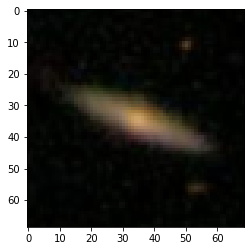

In [31]:
index = 4
plt.imshow((images[index]).astype(np.uint8))
print ("y = " + str(labels[index]))
print(labels[index])
